# 1) Сгенерировать выборку данных (нечетких чисел) для дальнейшей обработки моделью.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(42)

In [3]:
x = np.arange(1, 21, 1)
alpha = np.random.randint(0, 100, 20) / 100
beta = np.random.randint(0, 100, 20) / 100


In [4]:
x, alpha, beta

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([0.51, 0.92, 0.14, 0.71, 0.6 , 0.2 , 0.82, 0.86, 0.74, 0.74, 0.87,
        0.99, 0.23, 0.02, 0.21, 0.52, 0.01, 0.87, 0.29, 0.37]),
 array([0.01, 0.63, 0.59, 0.2 , 0.32, 0.75, 0.57, 0.21, 0.88, 0.48, 0.9 ,
        0.58, 0.41, 0.91, 0.59, 0.79, 0.14, 0.61, 0.61, 0.46]))

In [5]:
def func(x):
    return 1 + x/3 + np.sin(x)/2

In [6]:
y_moda = func(x)
y_moda

array([1.75406883, 2.12131538, 2.07056   , 1.95493209, 2.18720453,
       2.86029225, 3.66182663, 4.16134579, 4.20605924, 4.06132278,
       4.16667156, 4.73171354, 5.54341685, 6.16197034, 6.32514392,
       6.18938168, 6.18596792, 6.62450638, 7.40827194, 8.12313929])

In [7]:
y_alpha = y_moda - alpha
y_beta = y_moda + beta
y_alpha, y_beta

(array([1.24406883, 1.20131538, 1.93056   , 1.24493209, 1.58720453,
        2.66029225, 2.84182663, 3.30134579, 3.46605924, 3.32132278,
        3.29667156, 3.74171354, 5.31341685, 6.14197034, 6.11514392,
        5.66938168, 6.17596792, 5.75450638, 7.11827194, 7.75313929]),
 array([1.76406883, 2.75131538, 2.66056   , 2.15493209, 2.50720453,
        3.61029225, 4.23182663, 4.37134579, 5.08605924, 4.54132278,
        5.06667156, 5.31171354, 5.95341685, 7.07197034, 6.91514392,
        6.97938168, 6.32596792, 7.23450638, 8.01827194, 8.58313929]))

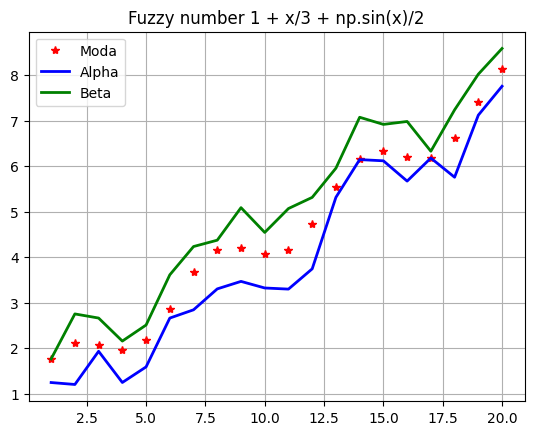

In [8]:
plt.plot(x, y_moda, 'r*', linewidth = 2, label ='Moda')
plt.plot(x, y_alpha, 'b', linewidth = 2, label ='Alpha')
plt.plot(x, y_beta, 'g', linewidth = 2, label ='Beta')
plt.title('Fuzzy number 1 + x/3 + np.sin(x)/2')
plt.legend()
plt.grid()
plt.show()

# Реализовать функции ковариации и дисперсии.

In [9]:
A = np.vstack([x, np.ones(len(x))]).T
A

array([[ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.],
       [20.,  1.]])

In [10]:
m, c = np.linalg.lstsq(A, y_moda)[0]
m, c

(np.float64(0.32744702886357707), np.float64(1.0867617440429351))

In [12]:
m1, c1 = np.linalg.lstsq(A, y_alpha)[0]
m2, c2 = np.linalg.lstsq(A, y_beta)[0]

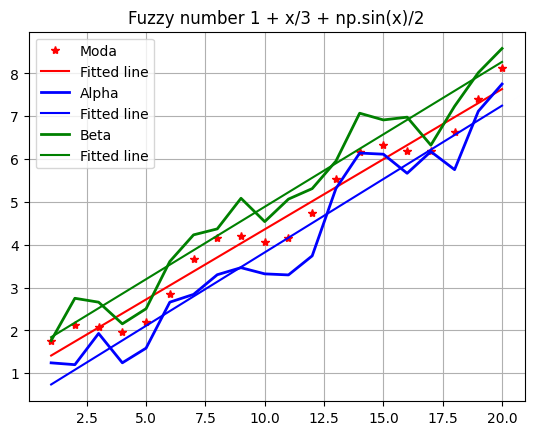

In [13]:
plt.plot(x, y_moda, 'r*', linewidth = 2, label ='Moda')
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.plot(x, y_alpha, 'b', linewidth = 2, label ='Alpha')
plt.plot(x, m1*x + c1, 'b', label='Fitted line')
plt.plot(x, y_beta, 'g', linewidth = 2, label ='Beta')
plt.plot(x, m2*x + c2, 'g', label='Fitted line')
plt.title('Fuzzy number 1 + x/3 + np.sin(x)/2')
plt.legend()
plt.grid()
plt.show()